In [3]:
import os
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords

In [4]:
# Dataset
dataset_path = os.path.join(os.getcwd(), 'dataset')
raw_dataset = os.path.join(dataset_path, 'spam_message.csv')
preprocessed_dataset = os.path.join(dataset_path, 'preprocessed_spam_message.csv')

In [5]:
df = pd.read_csv(raw_dataset, encoding_errors='ignore')
df = df[['v2', 'v1']]

df['v1'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)
df.columns = ['message', 'label']

df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
df['message'] = df['message'].apply(lambda x: x.lower())

df.head()

,message,label
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


In [7]:
df['tokenize'] = df['message'].apply(lambda x: nltk.word_tokenize(str(x)))

df['tokenize'][0]

['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [8]:
STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words: list[str]) -> list[str]:
    """Remove English stopwords from a list of tokens."""
    parsed_words: list[str] = list()
    
    for word in words:
        if word in STOP_WORDS:
            continue
        else:
            parsed_words.append(word)
            
    return parsed_words

df['tokenize_removed_stop_words'] = df['tokenize'].apply(remove_stop_words)
df['tokenize_removed_stop_words'][0]

['go',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amore',
 'wat',
 '...']

In [9]:
PUNCTUATION = set(string.punctuation)

def remove_punctuation(words: list[str]) -> list[str]:
    parsed_words: list[str] = list()

    for word in words:
        if word in PUNCTUATION:
            continue
        else:
            parsed_words.append(word)

    return parsed_words
    
df['tokenize_removed_stop_words_puctuation'] = df['tokenize_removed_stop_words'].apply(remove_punctuation)

df['tokenize_removed_stop_words_puctuation'][0]

['go',
 'jurong',
 'point',
 'crazy',
 '..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amore',
 'wat',
 '...']

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(words: list[str]):
    lemmatized_words: list[str] = list()
    
    for word in words:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    
    return lemmatized_words
    
df['tokenize_removed_stop_words_puctuation_lemmatized'] = df['tokenize_removed_stop_words_puctuation'].apply(lemmatize)

df['tokenize_removed_stop_words_puctuation_lemmatized'][0]

['go',
 'jurong',
 'point',
 'crazy',
 '..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amore',
 'wat',
 '...']

In [11]:
parsed_df = df[['tokenize_removed_stop_words_puctuation_lemmatized', 'label']]

def join_text(x):
    return ' '.join(x)

parsed_df['text'] = parsed_df['tokenize_removed_stop_words_puctuation_lemmatized'].apply(join_text)
parsed_df['class'] = parsed_df['label']
parsed_df = parsed_df.drop(['tokenize_removed_stop_words_puctuation_lemmatized', 'label'], axis=1)

parsed_df.head()

C:\Users\vinco\AppData\Local\Temp\ipykernel_31768\1125816785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df['text'] = parsed_df['tokenize_removed_stop_words_puctuation_lemmatized'].apply(join_text)
C:\Users\vinco\AppData\Local\Temp\ipykernel_31768\1125816785.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_df['class'] = parsed_df['label']


,text,class
0,go jurong point crazy .. available bugis n gre...,0
1,ok lar ... joking wif u oni ...,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor ... u c already say ...,0
4,nah n't think go usf life around though,0


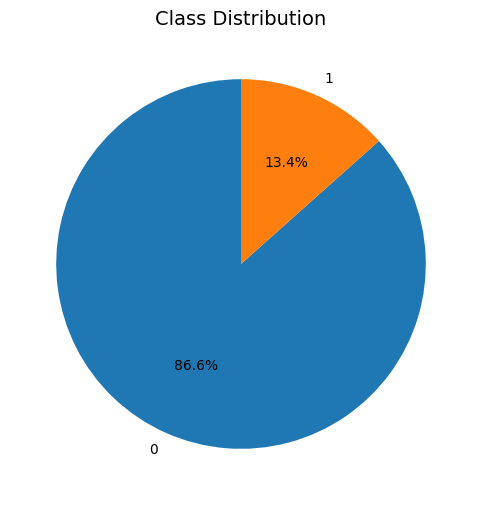

In [12]:
import matplotlib.pyplot as plt

# Count the number of samples per class
class_counts = parsed_df['class'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts, 
    labels=class_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    # shadow=True
)

# Add title
plt.title("Class Distribution", fontsize=14)
plt.show()

# Augmentation

In [15]:
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from deep_translator import GoogleTranslator

In [16]:
def synonym_replacement(sentence, n=2):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set(words))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name().replace("_", " ")
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)

def random_deletion(sentence, p=0.2):
    words = sentence.split()
    if len(words) == 1:
        return sentence
    new_words = [word for word in words if random.random() > p]
    return ' '.join(new_words) if new_words else random.choice(words)

def random_swap(sentence, n=1):
    words = sentence.split()
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

def back_translation(text, src='en', mid='fr'):
    try:
        translated = GoogleTranslator(source=src, target=mid).translate(text)
        back_translated = GoogleTranslator(source=mid, target=src).translate(translated)
        return back_translated
    except Exception:
        return text  # fallback if translation fails


In [18]:
# Identify minority class (for example, class 1)
minority_class = parsed_df['class'].value_counts().idxmin()
minority_df = parsed_df[parsed_df['class'] == minority_class]

augmented_rows = []

for _, row in minority_df.iterrows():
    text = row['text']
    label = row['class']

    # Generate multiple augmented versions
    aug_texts = [
        synonym_replacement(text),
        random_deletion(text),
        random_swap(text),
        back_translation(text)
    ]

    for aug_text in aug_texts:
        augmented_rows.append({'text': aug_text, 'class': label})

aug_df = pd.DataFrame(augmented_rows)


In [19]:
aug_df.head()

,text,class
0,free entry 2 wkly comp win fa cup final tkts 2...,1
1,free 2 wkly comp win fa cup final 21st 2005. t...,1
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,"free entry 2 weekly competitions, victory in t...",1
4,freemsg hey darling 's three week 's word back...,1


In [20]:
# Combine augmented with original dataset
df_augmented = pd.concat([parsed_df, aug_df], ignore_index=True)

# Shuffle the dataset
df_augmented = df_augmented.sample(frac=1, random_state=42).reset_index(drop=True)

print("Before augmentation:", parsed_df['class'].value_counts())
print("After augmentation:", df_augmented['class'].value_counts())


Before augmentation: class
0    4825
1     747
Name: count, dtype: int64
After augmentation: class
0    4825
1    3735
Name: count, dtype: int64


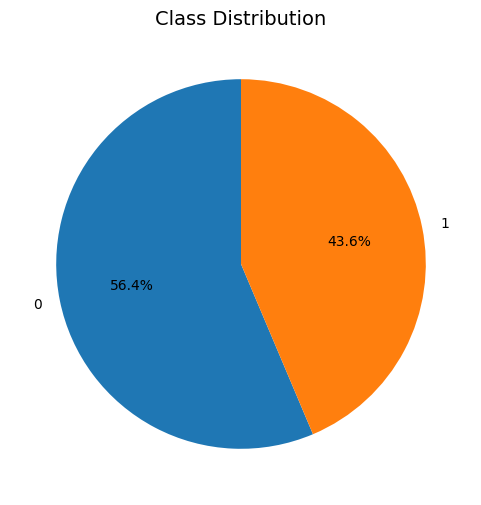

In [23]:
import matplotlib.pyplot as plt

# Count the number of samples per class
class_counts = df_augmented['class'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts, 
    labels=class_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    # shadow=True
)

# Add title
plt.title("Class Distribution", fontsize=14)
plt.show()

In [ ]:
df_augmented.to_csv(preprocessed_dataset)

In [ ]:
# parsed_df.to_csv(preprocessed_dataset)